In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [13]:
X = data.values[:, :2].T
y = data.values[:, 2:].T



Concatenate and normalize X

In [14]:
X = np.concatenate([np.ones([1, X.shape[1]]), X])
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

In [15]:
print(y)

[[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
  1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
  1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
  1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1.]]


In [16]:
admitted_ex1 = []
admitted_ex2 = []
not_admitted_ex1 = []
not_admitted_ex2 = []
for i in range(len(X[0])):
    if y[0,i] == 0:
        not_admitted_ex1.append(X[1][i])
        not_admitted_ex2.append(X[2][i])
    else:
        admitted_ex1.append(X[1,i])
        admitted_ex2.append(X[2,i])




Text(0, 0.5, 'Exam 2')

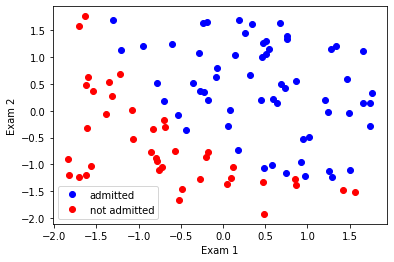

In [17]:
plt.plot(admitted_ex1, admitted_ex2, 'bo', label='admitted')
plt.plot(not_admitted_ex1, not_admitted_ex2, 'ro', label ='not admitted')
plt.legend()
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

sig(t)

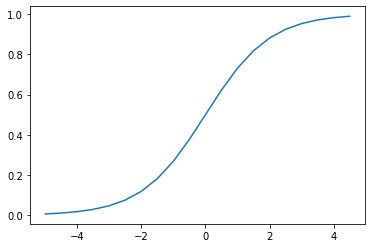

In [18]:
def sig(t):
    return 1/ (1 + np.exp(t*(-1)))

tt = np.arange(-5, 5, 0.5)
plt.plot(tt, sig(tt))

In [19]:
theta = np.zeros((X.shape[0], 1))

In [40]:
def costt(theta, X, y):
    
    h = sig(theta.T @ X)
    cost = -y * np.log(h) - (1 - y)*np.log(1 - h)
    J = cost.sum()/X.shape[1]
    return J
print(costt(theta, X, y))

0.6931471805599453


In [41]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for i in range(it):
        h = sig(theta.T @ X)

        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost += [costt(theta, X, y)]

    return theta, cost

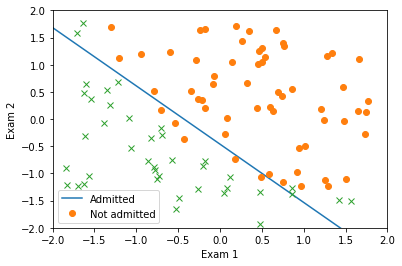

In [49]:
theta, cost = simple_gradient(X, y, theta, 1, 150)

x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o')
plt.plot(X1_0, X2_0, 'x')
plt.legend(['Admitted', 'Not admitted'])
plt.ylabel('Exam 2')
plt.xlabel('Exam 1')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()


Scikit-learn

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=100000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [54]:
y_pred = logreg.predict(X_test)

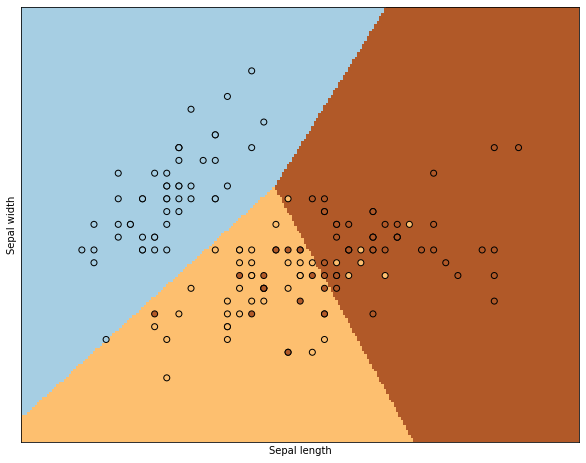

In [56]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()